<a href="https://colab.research.google.com/github/AndrewO-D/School-Assignment/blob/main/Fire_and_Aerosols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
from warnings import filterwarnings
import os
# Load the Excel file
file_path = '/content/Aerosol & Fire Forecast Data_Atmostech.xlsx'
data = pd.read_excel(file_path)
import warnings
from warnings import filterwarnings

In [129]:
data=data[(data['Date']>='2024-12-06') & (data['Date']<'2025-01-31')]
data

,Date,TA_0:00 UTC,TA_6:00 UTC,TA_12:00 UTC,DA_0:00 UTC,DA_6:00 UTC,DA_12:00 UTC,SSA_0:00 UTC,SSA_6:00 UTC,SSA_12:00 UTC,...,BA_6:00 UTC,BA_12:00 UTC,SA_0:00 UTC,SA_6:00 UTC,SA_12:00 UTC,FR_0:00 UTC,FR_6:00 UTC,FR_12:00 UTC,Unnamed: 19,Unnamed: 20
0,2024-12-06,0.195,0.195,0.390,0.00,0.00,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,39.0,39.0,39.0,NaN,NaN
1,2024-12-07,0.325,0.390,0.390,0.00,0.10,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,7.0,7.0,7.0,NaN,NaN
2,2024-12-08,0.455,0.580,0.580,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.000,0.000,0.0,0.0,0.0,NaN,NaN
3,2024-12-09,0.645,0.645,0.710,0.20,0.26,0.26,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,32.0,32.0,32.0,NaN,NaN
4,2024-12-10,0.580,0.580,0.645,0.16,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.260,32.0,32.0,32.0,NaN,NaN
5,2024-12-11,0.520,0.580,0.520,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,13.0,13.0,13.0,NaN,NaN
6,2024-12-12,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,14.0,14.0,NaN,NaN
7,2024-12-13,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,21.0,27.0,NaN,NaN
8,2024-12-14,0.580,0.580,0.520,0.26,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.195,0.130,19.0,19.0,19.0,NaN,NaN
9,2024-12-15,0.455,0.520,0.520,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,19.0,19.0,19.0,NaN,NaN


In [130]:
data.columns

Index(['Date', 'TA_0:00 UTC', 'TA_6:00 UTC', 'TA_12:00 UTC', 'DA_0:00 UTC',
       'DA_6:00 UTC', 'DA_12:00 UTC', 'SSA_0:00 UTC', 'SSA_6:00 UTC',
       'SSA_12:00 UTC', ' BA_0:00 UTC', 'BA_6:00 UTC', 'BA_12:00 UTC',
       'SA_0:00 UTC', 'SA_6:00 UTC', 'SA_12:00 UTC', 'FR_0:00 UTC',
       'FR_6:00 UTC', 'FR_12:00 UTC', 'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')

In [131]:
def split_daily_excel(input_file, output_dir):
    """
    Splits specific worksheets in the 'daily.xls' Excel file into individual files.

    Args:
        input_file (str): Path to the 'daily.xls' file.
        output_dir (str): Directory where individual Excel files will be saved.
    """
    try:
        # Ensure the output directory exists
        os.makedirs(output_dir, exist_ok=True)

        # Specify the worksheets to process
        sheet_names = ['Accra', 'Kumasi','Ougadougou', 'Lome','Port-Novo', 'Abidjan','Lagos','Yamoussoukro']

        # Iterate through the specified sheets and save them separately
        for sheet_name in sheet_names:
            print(f"Processing sheet: {sheet_name}")
            df = pd.read_excel(input_file, sheet_name=sheet_name)

            # Sanitize the sheet name for use in file names
            sanitized_sheet_name = sheet_name.replace(" ", "_").replace("/", "-")
            output_file = os.path.join(output_dir, f"{sanitized_sheet_name}.xlsx")

            # Save the sheet as a new Excel file
            df.to_excel(output_file, index=False, engine='openpyxl')
            print(f"Saved {sheet_name} to {output_file}")
    except Exception as e:
        print(f"Error occurred: {e}")

# Example usage
input_file_path = '/content/Aerosol & Fire Forecast Data_Atmostech.xlsx'  # Path to your Excel file
output_directory = "/content"  # Desired output directory
split_daily_excel(input_file_path, output_directory)

Processing sheet: Accra
Saved Accra to /content/Accra.xlsx
Processing sheet: Kumasi
Saved Kumasi to /content/Kumasi.xlsx
Processing sheet: Ougadougou
Saved Ougadougou to /content/Ougadougou.xlsx
Processing sheet: Lome
Saved Lome to /content/Lome.xlsx
Processing sheet: Port-Novo
Saved Port-Novo to /content/Port-Novo.xlsx
Processing sheet: Abidjan
Saved Abidjan to /content/Abidjan.xlsx
Processing sheet: Lagos
Saved Lagos to /content/Lagos.xlsx
Processing sheet: Yamoussoukro
Saved Yamoussoukro to /content/Yamoussoukro.xlsx


In [79]:
data.iloc[1:50]

,Date,TA_0:00 UTC,TA_6:00 UTC,TA_12:00 UTC,DA_0:00 UTC,DA_6:00 UTC,DA_12:00 UTC,SSA_0:00 UTC,SSA_6:00 UTC,SSA_12:00 UTC,...,BA_6:00 UTC,BA_12:00 UTC,SA_0:00 UTC,SA_6:00 UTC,SA_12:00 UTC,FR_0:00 UTC,FR_6:00 UTC,FR_12:00 UTC,Unnamed: 19,Unnamed: 20
1,2024-12-07,0.325,0.390,0.390,0.00,0.10,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,7.0,7.0,7.0,NaN,NaN
2,2024-12-08,0.455,0.580,0.580,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.000,0.000,0.0,0.0,0.0,NaN,NaN
3,2024-12-09,0.645,0.645,0.710,0.20,0.26,0.26,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,32.0,32.0,32.0,NaN,NaN
4,2024-12-10,0.580,0.580,0.645,0.16,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.260,32.0,32.0,32.0,NaN,NaN
5,2024-12-11,0.520,0.580,0.520,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,13.0,13.0,13.0,NaN,NaN
6,2024-12-12,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,14.0,14.0,NaN,NaN
7,2024-12-13,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,21.0,27.0,NaN,NaN
8,2024-12-14,0.580,0.580,0.520,0.26,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.195,0.130,19.0,19.0,19.0,NaN,NaN
9,2024-12-15,0.455,0.520,0.520,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,19.0,19.0,19.0,NaN,NaN
10,2024-12-16,0.520,0.645,0.580,0.13,0.26,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.000,0.000,10.0,10.0,10.0,NaN,NaN


In [86]:
data[' BA_0:00 UTC']

,BA_0:00 UTC
0,0.00
1,0.00
2,0.13
3,0.13
4,0.13
...,...
80,NaN
81,NaN
82,NaN
83,NaN


In [146]:
# Load the Excel file
file_path = '/content/Accra.xlsx'
data = pd.read_excel(file_path)

In [148]:
data

,Date,TA_0:00 UTC,TA_6:00 UTC,TA_12:00 UTC,DA_0:00 UTC,DA_6:00 UTC,DA_12:00 UTC,SSA_0:00 UTC,SSA_6:00 UTC,SSA_12:00 UTC,...,BA_6:00 UTC,BA_12:00 UTC,SA_0:00 UTC,SA_6:00 UTC,SA_12:00 UTC,FR_0:00 UTC,FR_6:00 UTC,FR_12:00 UTC,Unnamed: 19,Unnamed: 20
0,2024-12-06,0.195,0.195,0.390,0.00,0.00,0.13,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,39.0,39.0,39.0,NaN,NaN
1,2024-12-07,0.325,0.390,0.390,0.00,0.10,0.13,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,7.0,7.0,7.0,NaN,NaN
2,2024-12-08,0.455,0.580,0.580,0.13,0.13,0.20,0.0,0.0,0.0,...,0.13,0.13,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
3,2024-12-09,0.645,0.645,0.710,0.20,0.26,0.26,0.0,0.0,0.0,...,0.13,0.13,0.00,0.13,0.13,32.0,32.0,32.0,NaN,NaN
4,2024-12-10,0.580,0.580,0.645,0.16,0.20,0.20,0.0,0.0,0.0,...,0.13,0.13,0.13,0.13,0.26,32.0,32.0,32.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2025-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,2025-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2025-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2025-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
data.columns

Index(['Date', 'TA_0:00 UTC', 'TA_6:00 UTC', 'TA_12:00 UTC', 'DA_0:00 UTC',
       'DA_6:00 UTC', 'DA_12:00 UTC', 'SSA_0:00 UTC', 'SSA_6:00 UTC',
       'SSA_12:00 UTC', ' BA_0:00 UTC', 'BA_6:00 UTC', 'BA_12:00 UTC',
       'SA_0:00 UTC', 'SA_6:00 UTC', 'SA_12:00 UTC', 'FR_0:00 UTC',
       'FR_6:00 UTC', 'FR_12:00 UTC', 'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')

In [151]:
ds=data[(data['Date']>='2024-12-06') & (data['Date']<'2025-01-31')]
ds

,Date,TA_0:00 UTC,TA_6:00 UTC,TA_12:00 UTC,DA_0:00 UTC,DA_6:00 UTC,DA_12:00 UTC,SSA_0:00 UTC,SSA_6:00 UTC,SSA_12:00 UTC,...,BA_6:00 UTC,BA_12:00 UTC,SA_0:00 UTC,SA_6:00 UTC,SA_12:00 UTC,FR_0:00 UTC,FR_6:00 UTC,FR_12:00 UTC,Unnamed: 19,Unnamed: 20
0,2024-12-06,0.195,0.195,0.390,0.00,0.00,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,39.0,39.0,39.0,NaN,NaN
1,2024-12-07,0.325,0.390,0.390,0.00,0.10,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,7.0,7.0,7.0,NaN,NaN
2,2024-12-08,0.455,0.580,0.580,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.000,0.000,0.0,0.0,0.0,NaN,NaN
3,2024-12-09,0.645,0.645,0.710,0.20,0.26,0.26,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,32.0,32.0,32.0,NaN,NaN
4,2024-12-10,0.580,0.580,0.645,0.16,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.260,32.0,32.0,32.0,NaN,NaN
5,2024-12-11,0.520,0.580,0.520,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,13.0,13.0,13.0,NaN,NaN
6,2024-12-12,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,14.0,14.0,NaN,NaN
7,2024-12-13,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,21.0,27.0,NaN,NaN
8,2024-12-14,0.580,0.580,0.520,0.26,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.195,0.130,19.0,19.0,19.0,NaN,NaN
9,2024-12-15,0.455,0.520,0.520,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,19.0,19.0,19.0,NaN,NaN


In [135]:
# ds=df[(df['Date']>='2024-12-06') & (df['Date']<'2025-01-31')]
# ds

In [136]:
ds

,Date,TA_0:00 UTC,TA_6:00 UTC,TA_12:00 UTC,DA_0:00 UTC,DA_6:00 UTC,DA_12:00 UTC,SSA_0:00 UTC,SSA_6:00 UTC,SSA_12:00 UTC,...,BA_6:00 UTC,BA_12:00 UTC,SA_0:00 UTC,SA_6:00 UTC,SA_12:00 UTC,FR_0:00 UTC,FR_6:00 UTC,FR_12:00 UTC,Unnamed: 19,Unnamed: 20
0,2024-12-06,0.195,0.195,0.390,0.00,0.00,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,39.0,39.0,39.0,NaN,NaN
1,2024-12-07,0.325,0.390,0.390,0.00,0.10,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,7.0,7.0,7.0,NaN,NaN
2,2024-12-08,0.455,0.580,0.580,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.000,0.000,0.0,0.0,0.0,NaN,NaN
3,2024-12-09,0.645,0.645,0.710,0.20,0.26,0.26,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,32.0,32.0,32.0,NaN,NaN
4,2024-12-10,0.580,0.580,0.645,0.16,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.260,32.0,32.0,32.0,NaN,NaN
5,2024-12-11,0.520,0.580,0.520,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,13.0,13.0,13.0,NaN,NaN
6,2024-12-12,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,14.0,14.0,NaN,NaN
7,2024-12-13,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,21.0,27.0,NaN,NaN
8,2024-12-14,0.580,0.580,0.520,0.26,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.195,0.130,19.0,19.0,19.0,NaN,NaN
9,2024-12-15,0.455,0.520,0.520,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,19.0,19.0,19.0,NaN,NaN


In [94]:
# # Check if 'BA' columns are present in the DataFrame
# ba_columns = [' BA_0:00 UTC', 'BA_6:00 UTC', 'BA_12:00 UTC']
# missing_ba_columns = [col for col in ba_columns if col not in ds.columns]

# if missing_ba_columns:
#     print(f"The following 'BA' columns are missing: {missing_ba_columns}")
# else:
#     print("All 'BA' columns are present in the DataFrame.")

All 'BA' columns are present in the DataFrame.


In [121]:
ds

,Date,TA_0:00 UTC,TA_6:00 UTC,TA_12:00 UTC,DA_0:00 UTC,DA_6:00 UTC,DA_12:00 UTC,SSA_0:00 UTC,SSA_6:00 UTC,SSA_12:00 UTC,...,BA_6:00 UTC,BA_12:00 UTC,SA_0:00 UTC,SA_6:00 UTC,SA_12:00 UTC,FR_0:00 UTC,FR_6:00 UTC,FR_12:00 UTC,Unnamed: 19,Unnamed: 20
0,2024-12-06,0.195,0.195,0.390,0.00,0.00,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,39.0,39.0,39.0,NaN,NaN
1,2024-12-07,0.325,0.390,0.390,0.00,0.10,0.13,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,7.0,7.0,7.0,NaN,NaN
2,2024-12-08,0.455,0.580,0.580,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.000,0.000,0.0,0.0,0.0,NaN,NaN
3,2024-12-09,0.645,0.645,0.710,0.20,0.26,0.26,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,32.0,32.0,32.0,NaN,NaN
4,2024-12-10,0.580,0.580,0.645,0.16,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.260,32.0,32.0,32.0,NaN,NaN
5,2024-12-11,0.520,0.580,0.520,0.13,0.13,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,13.0,13.0,13.0,NaN,NaN
6,2024-12-12,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,14.0,14.0,NaN,NaN
7,2024-12-13,0.580,0.645,0.645,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.130,0.130,14.0,21.0,27.0,NaN,NaN
8,2024-12-14,0.580,0.580,0.520,0.26,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.130,0.195,0.130,19.0,19.0,19.0,NaN,NaN
9,2024-12-15,0.455,0.520,0.520,0.20,0.20,0.20,0.0,0.0,0.0,...,0.130,0.130,0.000,0.130,0.130,19.0,19.0,19.0,NaN,NaN


In [137]:
ds['Date']

,Date
0,2024-12-06
1,2024-12-07
2,2024-12-08
3,2024-12-09
4,2024-12-10
5,2024-12-11
6,2024-12-12
7,2024-12-13
8,2024-12-14
9,2024-12-15


In [162]:

dt_1['TA']=(dt['TA_0:00 UTC']+ dt['TA_6:00 UTC']+ dt['TA_12:00 UTC'])/3
dt_1['TA']=(dt['TA_0:00 UTC']+ dt['TA_6:00 UTC']+ dt['TA_12:00 UTC'])/3
dt_1['DA']=(dt['DA_0:00 UTC']+ dt['DA_6:00 UTC']+ dt['DA_12:00 UTC'])/3
dt_1['SSA']=(dt['SSA_0:00 UTC']+ dt['SSA_6:00 UTC']+ dt['SSA_12:00 UTC'])/3
dt_1['BA']=(dt[' BA_0:00 UTC']+dt['BA_6:00 UTC']+ dt['BA_12:00 UTC'])/3
dt_1['SA']=(dt['SA_0:00 UTC']+dt['SA_6:00 UTC']+ dt['SA_12:00 UTC'])/3
dt_1['FR']=(dt['FR_0:00 UTC']+dt['FR_6:00 UTC']+ dt['FR_12:00 UTC'])/3

In [167]:
dt_1['Date'] = pd.to_datetime(ds['Date'])

In [169]:
dt_1.set_index('Date', inplace=True)


In [170]:
dt_1

,TA,DA,SSA,BA,SA,FR
Date,,,,,,
2024-12-06,0.260000,0.043333,0.0,0.000000,0.000000,39.000000
2024-12-07,0.368333,0.076667,0.0,0.000000,0.000000,7.000000
2024-12-08,0.538333,0.153333,0.0,0.130000,0.000000,0.000000
2024-12-09,0.666667,0.240000,0.0,0.130000,0.086667,32.000000
2024-12-10,0.601667,0.186667,0.0,0.130000,0.173333,32.000000
2024-12-11,0.540000,0.153333,0.0,0.130000,0.130000,13.000000
2024-12-12,0.623333,0.200000,0.0,0.130000,0.130000,14.000000
2024-12-13,0.623333,0.200000,0.0,0.130000,0.130000,20.666667
2024-12-14,0.560000,0.220000,0.0,0.130000,0.151667,19.000000


In [190]:
dt_1.to_excel('redefined_Accra.xlsx')
path_file='/content/redefined_Accra.xlsx'
accra_file=pd.read_excel(path_file)
accra_file

,Date,TA,DA,SSA,BA,SA,FR
0,2024-12-06,0.260000,0.043333,0,0.000000,0.000000,39.000000
1,2024-12-07,0.368333,0.076667,0,0.000000,0.000000,7.000000
2,2024-12-08,0.538333,0.153333,0,0.130000,0.000000,0.000000
3,2024-12-09,0.666667,0.240000,0,0.130000,0.086667,32.000000
4,2024-12-10,0.601667,0.186667,0,0.130000,0.173333,32.000000
5,2024-12-11,0.540000,0.153333,0,0.130000,0.130000,13.000000
6,2024-12-12,0.623333,0.200000,0,0.130000,0.130000,14.000000
7,2024-12-13,0.623333,0.200000,0,0.130000,0.130000,20.666667
8,2024-12-14,0.560000,0.220000,0,0.130000,0.151667,19.000000
9,2024-12-15,0.498333,0.200000,0,0.130000,0.086667,19.000000


In [191]:
accra_file.columns

Index(['Date', 'TA', 'DA', 'SSA', 'BA', 'SA', 'FR'], dtype='object')

In [192]:
data=accra_file
data

,Date,TA,DA,SSA,BA,SA,FR
0,2024-12-06,0.260000,0.043333,0,0.000000,0.000000,39.000000
1,2024-12-07,0.368333,0.076667,0,0.000000,0.000000,7.000000
2,2024-12-08,0.538333,0.153333,0,0.130000,0.000000,0.000000
3,2024-12-09,0.666667,0.240000,0,0.130000,0.086667,32.000000
4,2024-12-10,0.601667,0.186667,0,0.130000,0.173333,32.000000
5,2024-12-11,0.540000,0.153333,0,0.130000,0.130000,13.000000
6,2024-12-12,0.623333,0.200000,0,0.130000,0.130000,14.000000
7,2024-12-13,0.623333,0.200000,0,0.130000,0.130000,20.666667
8,2024-12-14,0.560000,0.220000,0,0.130000,0.151667,19.000000
9,2024-12-15,0.498333,0.200000,0,0.130000,0.086667,19.000000


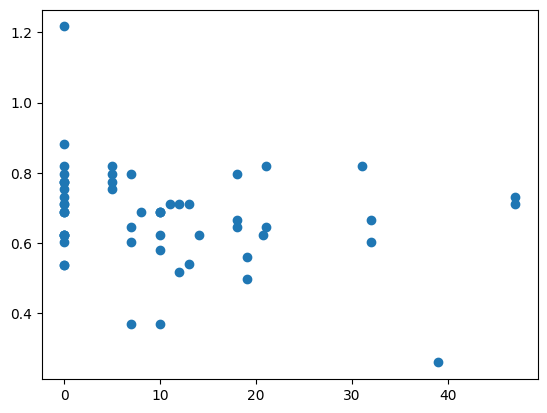

In [193]:
accra_scatter=plt.scatter(data.FR,data.TA)

In [40]:
from sklearn.linear_model import LinearRegression

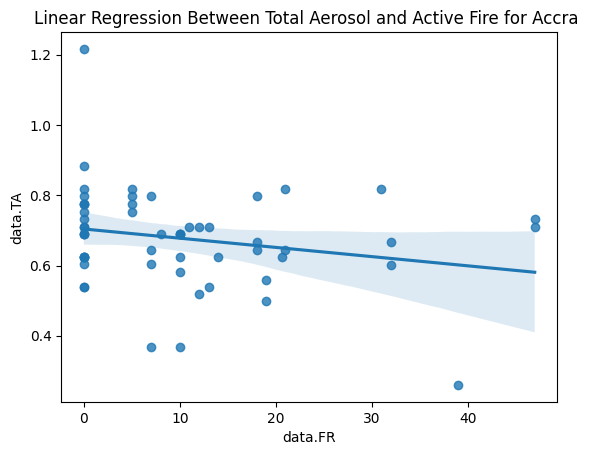

<Figure size 640x480 with 0 Axes>

In [189]:
# Assuming 'data' is your DataFrame
sns.regplot(x='FR', y='TA', data=df)
plt.title('Linear Regression Between Total Aerosol and Active Fire for Accra ')
plt.xlabel('data.FR')
plt.ylabel('data.TA')
plt.show()
plt.savefig('accrascatter_plot_with_regression_line.png')

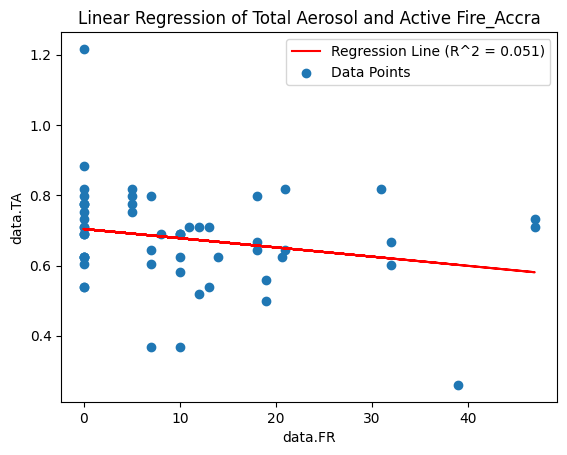

<Figure size 640x480 with 0 Axes>

In [194]:


# Create a Linear Regression model
model = LinearRegression()
X = data['FR'].values.reshape(-1, 1)  # Reshape for scikit-learn
y = data['TA']
model.fit(X, y)
r_squared = model.score(X, y)  # Calculate R-squared

# Predict values using the model
y_pred = model.predict(X)

# Plot the regression line
plt.plot(X, y_pred, color='red', label=f'Regression Line (R^2 = {r_squared:.3f})')

# Add scatter plot points
plt.scatter(data['FR'], data['TA'], label='Data Points')

plt.title('Linear Regression of Total Aerosol and Active Fire_Accra')
plt.xlabel('data.FR')
plt.ylabel('data.TA')
plt.legend()  # Display legend
plt.show()
plt.savefig('accra_scatter_plot_with_regression_line.png')

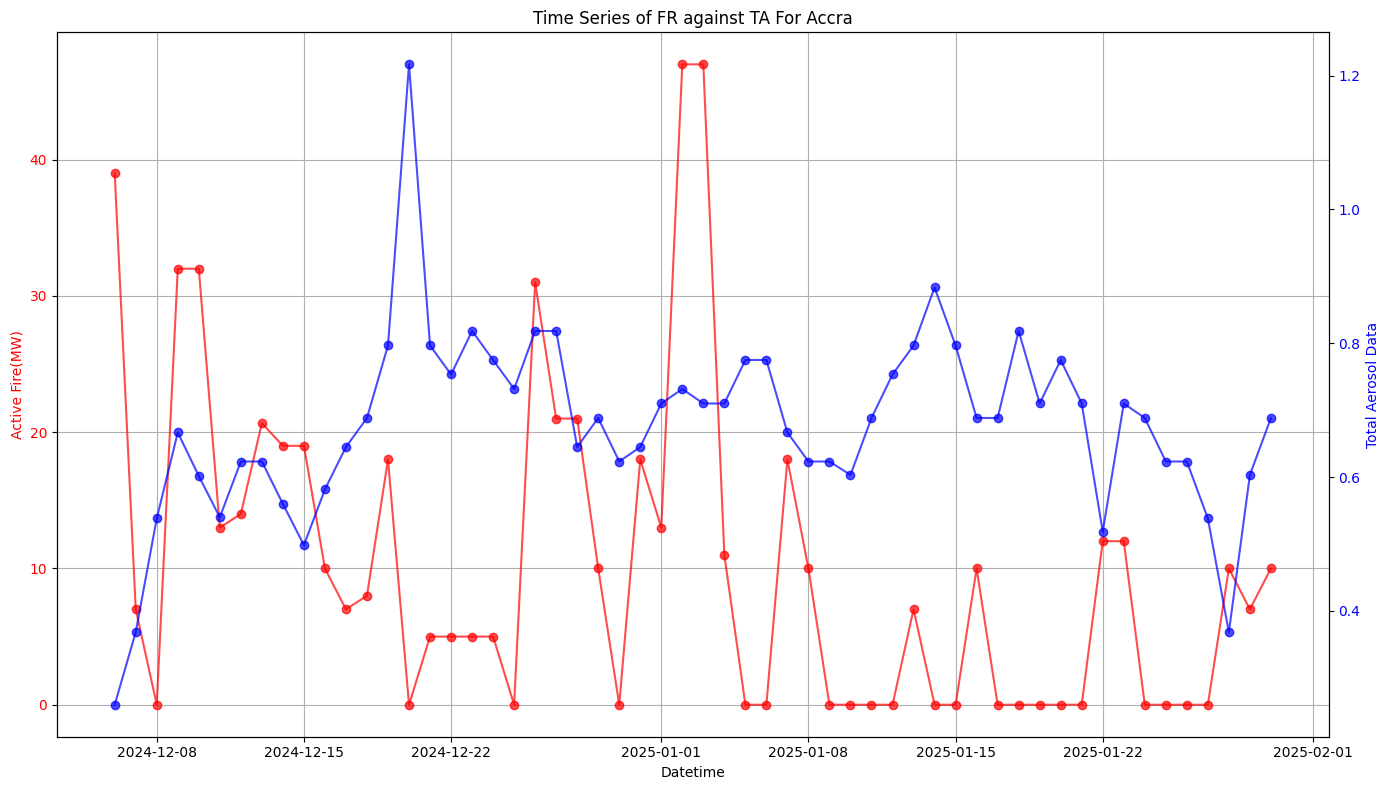

<Figure size 640x480 with 0 Axes>

In [197]:
# Time Series Plot with Twin Axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Fire Data on the left y-axis
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Active Fire(MW)', color='red')
ax1.plot(data['Date'], data['FR'], label='Fire Data', color='red', marker='o', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for Total Aerosol Data
ax2 = ax1.twinx()
ax2.set_ylabel('Total Aerosol Data', color='blue')
ax2.plot(data['Date'], data['TA'], label='Total Aerosol Data', color='blue', marker='o', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and grid
plt.title('Time Series of FR against TA For Accra')
ax1.grid(True)
fig.tight_layout()

plt.show()
plt.savefig('accra_time_series_plot_TA_and_FR.png')

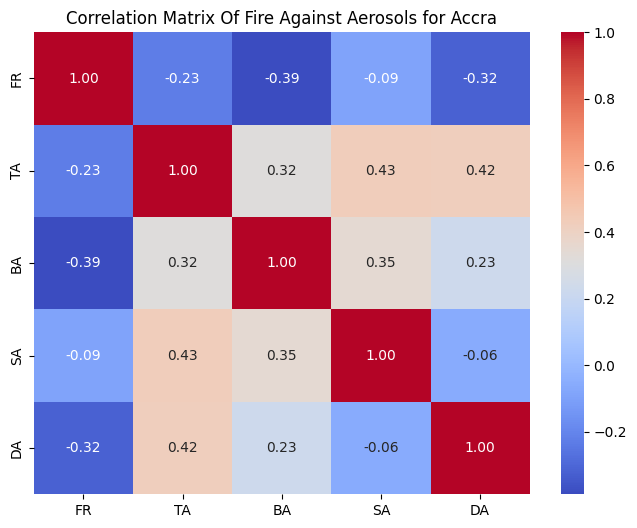

In [198]:
# Correlation Matrix with Heatmap
correlation_matrix = data[['FR', 'TA','BA','SA','DA']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Correlation Matrix Of Fire Against Aerosols for Accra')
plt.show()


In [216]:
#Kumasi

# Load the Excel file
file_path = '/content/Kumasi.xlsx'
data = pd.read_excel(file_path)

In [218]:
data

,Date,TA_0:00 UTC,TA_6:00 UTC,TA_12:00 UTC,DA_0:00 UTC,DA_6:00 UTC,DA_12:00 UTC,SSA_0:00 UTC,SSA_6:00 UTC,SSA_12:00 UTC,BA_0:00 UTC,BA_6:00 UTC,BA_12:00 UTC,SA_0:00 UTC,SA_6:00 UTC,SA_12:00 UTC,FR_0:00 UTC,FR_6:00 UTC,FR_12:00 UTC
0,2024-12-06,0.390,0.39,0.390,0.13,0.13,0.13,0.0,0.0,0.0,0.000,0.00,0.00,0.00,0.0,0.0,11.0,11.0,11.0
1,2024-12-07,0.455,0.39,0.390,0.13,0.13,0.13,0.0,0.0,0.0,0.130,0.00,0.00,0.00,0.0,0.0,11.0,11.0,11.0
2,2024-12-08,0.390,0.52,0.520,0.20,0.20,0.22,0.0,0.0,0.0,0.130,0.13,0.13,0.00,0.0,0.0,15.0,15.0,15.0
3,2024-12-09,0.710,0.58,0.580,0.52,0.45,0.19,0.0,0.0,0.0,0.195,0.13,0.13,0.00,0.0,0.0,17.0,17.0,17.0
4,2024-12-10,0.645,0.58,0.645,0.20,0.20,0.20,0.0,0.0,0.0,0.195,0.13,0.13,0.13,0.0,0.0,29.0,29.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2025-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,2025-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2025-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2025-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
data.columns

Index(['Date', 'TA_0:00 UTC', 'TA_6:00 UTC', 'TA_12:00 UTC', 'DA_0:00 UTC',
       'DA_6:00 UTC', 'DA_12:00 UTC', 'SSA_0:00 UTC ', 'SSA_6:00 UTC',
       'SSA_12:00 UTC', 'BA_0:00 UTC', 'BA_6:00 UTC', 'BA_12:00 UTC',
       'SA_0:00 UTC', 'SA_6:00 UTC', 'SA_12:00 UTC', 'FR_0:00 UTC',
       'FR_6:00 UTC', 'FR_12:00 UTC'],
      dtype='object')

In [213]:
ds=data[(data['Date']>='2024-12-06') & (data['Date']<'2025-01-31')]
ds

,Date,TA_0:00 UTC,TA_6:00 UTC,TA_12:00 UTC,DA_0:00 UTC,DA_6:00 UTC,DA_12:00 UTC,SSA_0:00 UTC,SSA_6:00 UTC,SSA_12:00 UTC,BA_0:00 UTC,BA_6:00 UTC,BA_12:00 UTC,SA_0:00 UTC,SA_6:00 UTC,SA_12:00 UTC,FR_0:00 UTC,FR_6:00 UTC,FR_12:00 UTC
0,2024-12-06,0.390,0.390,0.390,0.13,0.13,0.13,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,11.0,11.0,11.0
1,2024-12-07,0.455,0.390,0.390,0.13,0.13,0.13,0.0,0.0,0.0,0.130,0.000,0.000,0.000,0.000,0.000,11.0,11.0,11.0
2,2024-12-08,0.390,0.520,0.520,0.20,0.20,0.22,0.0,0.0,0.0,0.130,0.130,0.130,0.000,0.000,0.000,15.0,15.0,15.0
3,2024-12-09,0.710,0.580,0.580,0.52,0.45,0.19,0.0,0.0,0.0,0.195,0.130,0.130,0.000,0.000,0.000,17.0,17.0,17.0
4,2024-12-10,0.645,0.580,0.645,0.20,0.20,0.20,0.0,0.0,0.0,0.195,0.130,0.130,0.130,0.000,0.000,29.0,29.0,29.0
5,2024-12-11,0.645,0.520,0.455,0.20,0.20,0.20,0.0,0.0,0.0,0.195,0.130,0.130,0.130,0.130,0.130,21.0,21.0,21.0
6,2024-12-12,0.580,0.580,0.580,0.20,0.20,0.20,0.0,0.0,0.0,0.130,0.130,0.130,0.130,0.000,0.000,23.0,23.0,23.0
7,2024-12-13,0.580,0.710,0.520,0.20,0.20,0.13,0.0,0.0,0.0,0.130,0.130,0.130,0.130,0.130,0.130,16.0,16.0,16.0
8,2024-12-14,0.645,0.520,0.455,0.26,0.20,0.20,0.0,0.0,0.0,0.195,0.000,0.130,0.000,0.000,0.000,26.0,26.0,26.0
9,2024-12-15,0.580,0.455,0.455,0.39,0.20,0.20,0.0,0.0,0.0,0.130,0.130,0.130,0.000,0.130,0.000,23.0,23.0,23.0


In [214]:
dt_2=pd.DataFrame()
dt_2

""


In [209]:
 dt_2['Date']=pd.to_datetime(ds['Date'])
dt_2['TA']=(ds['TA_0:00 UTC']+ ds['TA_6:00 UTC']+ ds['TA_12:00 UTC'])/3
dt_2['TA']=(ds['TA_0:00 UTC']+ ds['TA_6:00 UTC']+ ds['TA_12:00 UTC'])/3
dt_2['DA']=(ds['DA_0:00 UTC']+ ds['DA_6:00 UTC']+ ds['DA_12:00 UTC'])/3
dt_2['SSA']=(ds[' SSA_0:00 UTC']+ ds['SSA_6:00 UTC']+ ds['SSA_12:00 UTC'])/3
dt_2['BA']=(ds[' BA_0:00 UTC']+ds['BA_6:00 UTC']+ ds['BA_12:00 UTC'])/3
dt_2['SA']=(ds['SA_0:00 UTC']+ds['SA_6:00 UTC']+ ds['SA_12:00 UTC'])/3
dt_2['FR']=(ds['FR_0:00 UTC']+ds['FR_6:00 UTC']+ ds['FR_12:00 UTC'])/3

KeyError: ' SSA_0:00 UTC'